Using device: cuda
  Epoch: 15
  Best F1: 0.6114
  Metrics: F1=0.6114, IoU=0.4403
Model loaded successfully from ../checkpoints/best_model.pth


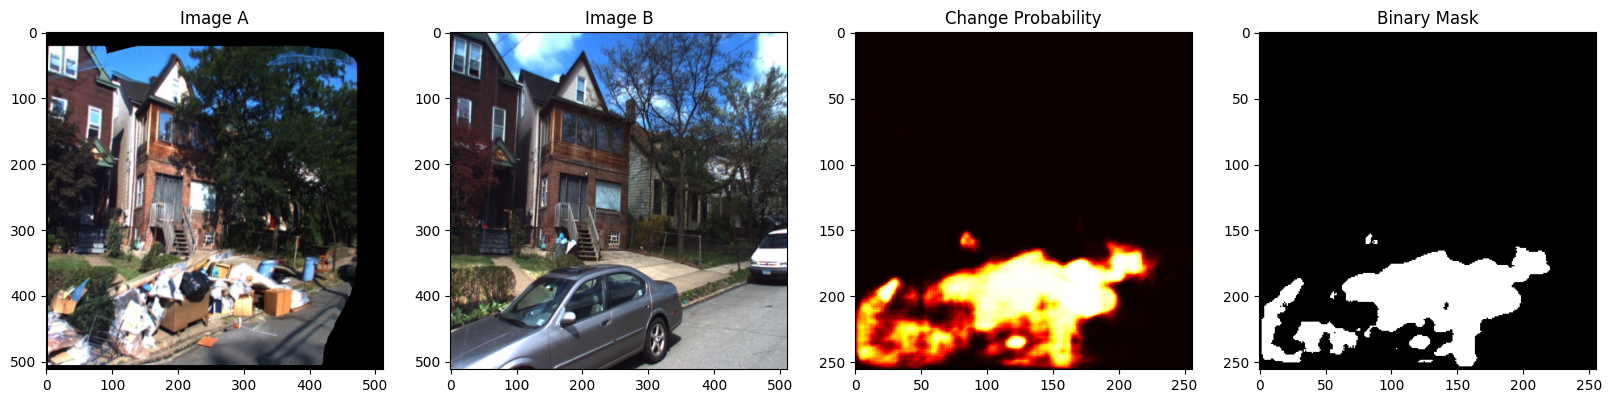

In [16]:
# test_notebook.ipynb

import torch
from src.inference import ChangeDetector
from PIL import Image
import matplotlib.pyplot as plt

# Model yükle
detector = ChangeDetector('../checkpoints/best_model.pth', device='cuda')

# Test
img_a = Image.open('../data/processed/test/A/000_1_00_0.png').convert('RGB')
img_b = Image.open('../data/processed/test/B/000_1_00_0.png').convert('RGB')

change_map, change_binary = detector.predict(img_a, img_b)

# İnteraktif görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(img_a)
axes[0].set_title('Image A')
axes[1].imshow(img_b)
axes[1].set_title('Image B')
axes[2].imshow(change_map, cmap='hot')
axes[2].set_title('Change Probability')
axes[3].imshow(change_binary, cmap='gray')
axes[3].set_title('Binary Mask')
plt.show()
